# <center><font color='MAROON'>Traffic Sign Recognition Classifier</font></center>

In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import seaborn as sns
import numpy as np
import os
import math
import keras
import wandb

Using TensorFlow backend.


## <font color='crimson'>Importing GTSRB - German Traffic Sign Recognition Benchmark Datasets</font>


<font color='maroon'>Dataset for this project is available at:</font>

https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [2]:
current_path = os.getcwd()
print(current_path)

C:\Users\junth\Traffic-Signs-Recognition-System


In [3]:
classes = 43
classes_name = ['Speed limit (20km/h)',
                'Speed limit (30km/h)', 
                'Speed limit (50km/h)', 
                'Speed limit (60km/h)', 
                'Speed limit (70km/h)', 
                'Speed limit (80km/h)', 
                'End of speed limit (80km/h)', 
                'Speed limit (100km/h)', 
                'Speed limit (120km/h)', 
                'No passing', 
                'No passing veh over 3.5 tons', 
                'Right-of-way at intersection', 
                'Priority road', 
                'Yield', 
                'Stop', 
                'No vehicles', 
                'Veh > 3.5 tons prohibited', 
                'No entry', 
                'General caution', 
                'Dangerous curve left', 
                'Dangerous curve right', 
                'Double curve', 
                'Bumpy road', 
                'Slippery road', 
                'Road narrows on the right', 
                'Road work', 
                'Traffic signals', 
                'Pedestrians', 
                'Children crossing', 
                'Bicycles crossing', 
                'Beware of ice/snow',
                'Wild animals crossing', 
                'End speed + passing limits', 
                'Turn right ahead', 
                'Turn left ahead', 
                'Ahead only', 
                'Go straight or right', 
                'Go straight or left', 
                'Keep right', 
                'Keep left', 
                'Roundabout mandatory', 
                'End of no passing', 
                'End no passing veh > 3.5 tons' 
               ]

In [4]:
def ImageReader(define_path):
    data = []
    path = os.path.join(current_path,'gtsrb-german-traffic-sign',define_path)
    images = os.listdir(path)

    for traffic_sign in tqdm(images):
        try:
            image = Image.open(path + '\\'+ traffic_sign)
            image = image.resize((32,32))
            image = np.array(image)

            data.append(image)
        except:
            print("Error Loading Image!")
    return data

In [5]:
test_images = ImageReader('test')
X_test = np.array(test_images)
print("      X_test                      \n{0}                ".format(X_test.shape))

100%|██████████| 12630/12630 [01:05<00:00, 193.57it/s]

      X_test                      
(12630, 32, 32, 3)                


## <font color='crimson'>Contrast Limited Adaptive Histogram Equalization (CLAHE)</font>

---

<font color='maroon'>An algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image.</font>

https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist

<font color='maroon'>Clipping limit, normalized between 0 and 1 (higher values give more contrast).</font>

---

In [6]:
from skimage import data, img_as_float
from skimage import exposure

In [7]:
# Function that applies normalization and local contrast enhancement

def normalize(image_data):
    
    """An algorithm for local contrast enhancement, that uses histograms computed over 
    different tile regions of the image. Local details can therefore be enhanced even in 
    regions that are darker or lighter than most of the image."""
    
    norm = np.array([exposure.equalize_adapthist(image, clip_limit=0.1) for image in tqdm(image_data)])
    return norm

In [8]:
# Run the normalization process

print('\nNormalizing Test Images...')
X_test_norm = normalize(X_test)

print('\nNormaliztion Complete.')

  0%|          | 0/12630 [00:00<?, ?it/s]


Normalizing Test Images...


C:\Users\junth\Anaconda3\envs\Traffic Sign Recognition System\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
100%|██████████| 12630/12630 [03:39<00:00, 57.51it/s]



Normaliztion Complete.


# <center><font color='MAROON'>Model Architecture</font></center>
---

## <font color='DARKMAGENTA'>1. LeNet-5</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/sfserq93?workspace=user-junth

## <font color='DARKMAGENTA'>2. LeNet-5 + Contrast Enhancement</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/kcebxhfe?workspace=user-junth

## <font color='DARKMAGENTA'>3. LeNet-5 + Contrast Enhancement + Augmentation(3000)</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/qc0c461b?workspace=user-junth

## <font color='DARKMAGENTA'>4. Deep LeNet-5 + Contrast Enhancement + Augmentation(3000)</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/zllcbd7m?workspace=user-junth

## <font color='DARKMAGENTA'>5. Deep LeNet-5 + Contrast Enhancement + Augmentation(4500) + Regularization</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/2atxo1cf?workspace=user-junth

---

<font color='maroon'>Saved model is also available at:</font>

https://github.com/Junth19/Traffic-Signs-Recognition-System

---

## <font color='crimson'>Loading (Deep LeNet-5 + Contrast Enhancement + Augmentation(4500) + Regularization) saved model</font>

In [10]:
from keras.models import load_model

model = load_model('./Models/(5) Deep LeNet-5 + Contrast Enhancement + Augmentation(4500) + Regularization/DeepLeNet-5_CLAHE_AUG(v2).h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

## <font color='crimson'>Calculating Test Accuracy</font>

In [11]:
from keras.utils import to_categorical

path = os.path.join(current_path,'gtsrb-german-traffic-sign','Test.csv')
data = pd.read_csv(path)
X_test = X_test_norm.astype('float32')
y_test = to_categorical(data['ClassId'].values)

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

12630/12630 [==============================] - 20s 2ms/step
0.9712588787078857


## <font color='crimson'>Make predictions and explore </font>
<font color='maroon'>With the model trained, we can use it to make predictions about some images.</font>

In [13]:
test_images = X_test
a = y_test
test_labels = [np.where(r==1)[0][0] for r in a]
predictions = model.predict(test_images)
print(predictions.shape)

(12630, 43)


## <font color='crimson'>Precision, Recall and F1-Score</font>

In [14]:
from sklearn.metrics import classification_report
y_pred = []
y_true = test_labels
for i in range(len(X_test)):
    y_pred.append(np.argmax(predictions[i]))
print(classification_report(y_true, y_pred, target_names=classes_name))

                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.92      1.00      0.96        60
         Speed limit (30km/h)       0.95      0.99      0.97       720
         Speed limit (50km/h)       0.98      0.98      0.98       750
         Speed limit (60km/h)       0.96      0.92      0.94       450
         Speed limit (70km/h)       1.00      0.97      0.98       660
         Speed limit (80km/h)       0.94      0.94      0.94       630
  End of speed limit (80km/h)       0.98      0.96      0.97       150
        Speed limit (100km/h)       0.95      0.99      0.97       450
        Speed limit (120km/h)       0.99      0.96      0.97       450
                   No passing       1.00      0.99      0.99       480
 No passing veh over 3.5 tons       1.00      1.00      1.00       660
 Right-of-way at intersection       0.99      0.93      0.96       420
                Priority road       1.00      0.98      0.99       690
     

## <font color='crimson'>Confusion Matrix </font>

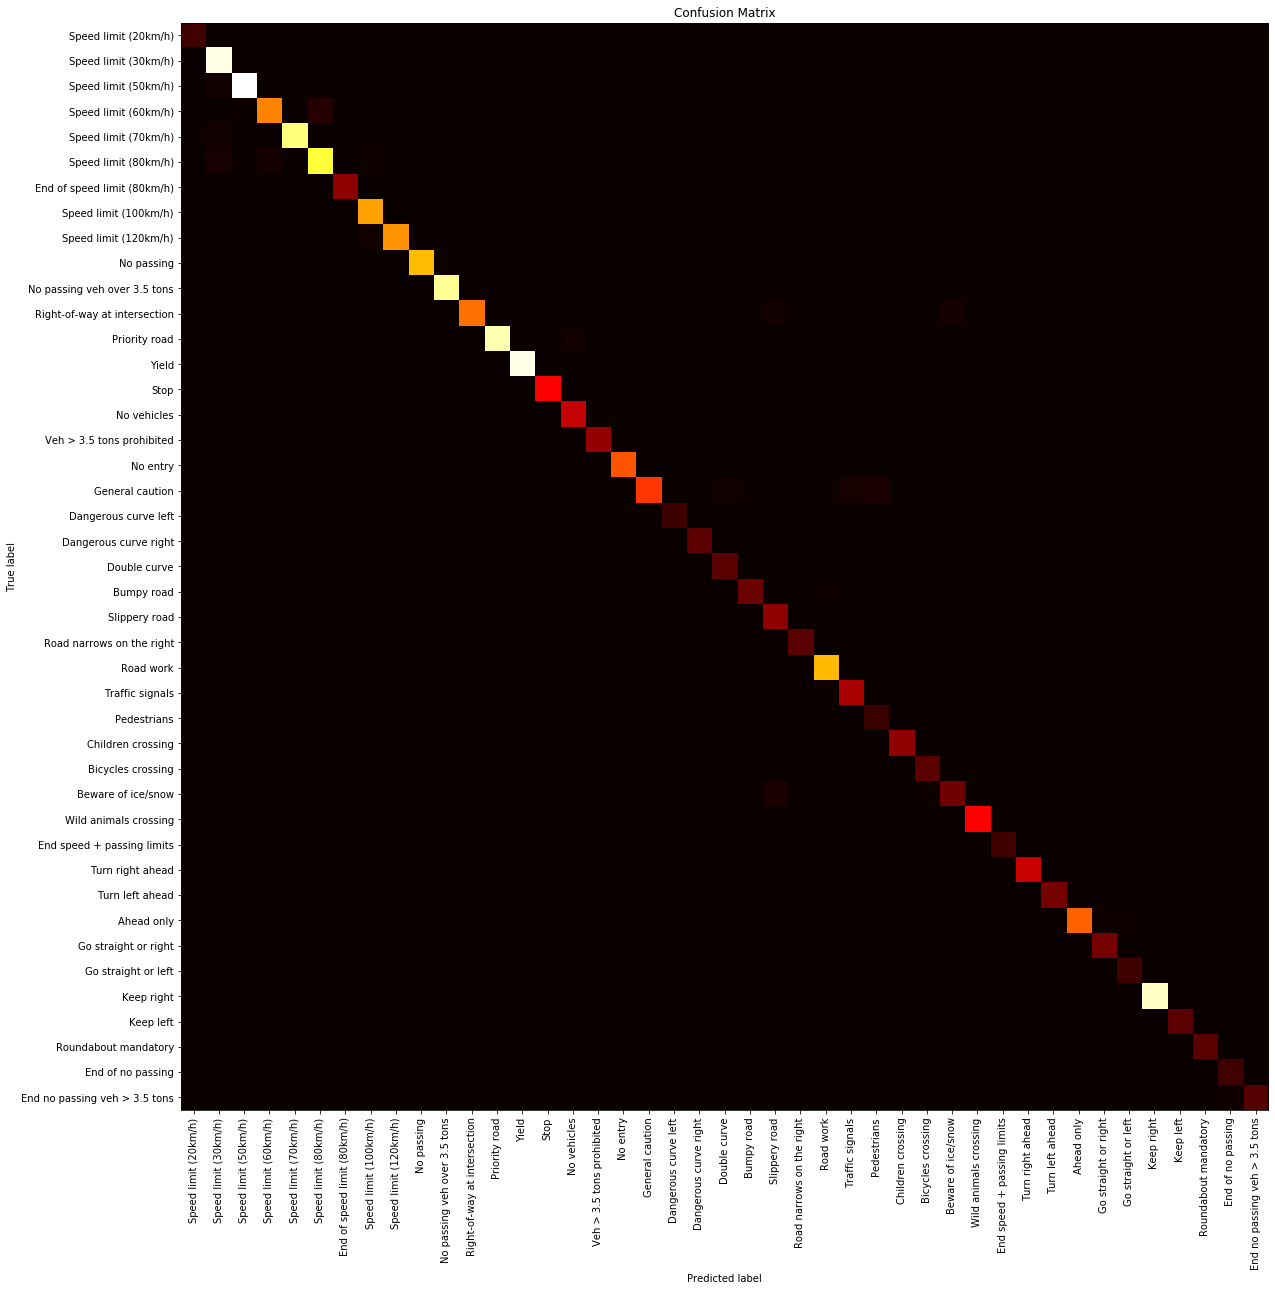

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.hot):
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('ConfusionMatrix.png', dpi = 300)

confusionMatrix = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(confusionMatrix, classes=classes_name,
                      title='Confusion Matrix')

<font color='maroon'>Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:</font>

In [16]:
print(predictions[0])

[5.53347113e-23 2.25632895e-24 1.87222466e-25 9.91451331e-21
 7.06093698e-24 1.73483569e-19 3.34171611e-25 1.29416843e-14
 3.36282177e-14 6.92636270e-12 6.68180795e-20 2.20045792e-23
 3.40702204e-21 9.43295660e-30 1.93325006e-23 3.08632277e-14
 1.00000000e+00 1.02493296e-16 5.17179646e-28 1.67891713e-25
 2.17810965e-23 2.98830122e-35 4.32103401e-35 1.87172291e-27
 1.75476087e-37 2.45436388e-33 8.27349231e-29 7.77186460e-31
 1.30555851e-25 3.56675635e-29 5.66223027e-23 1.09792030e-31
 1.48616160e-18 1.81068843e-17 7.66892546e-18 2.18846348e-22
 3.59798525e-20 1.06000669e-19 9.87950818e-22 1.95187933e-23
 1.53011538e-14 2.11024243e-16 9.74331762e-21]


<font color='maroon'>A prediction is an array of 43 numbers. These describe the "confidence" of the model that the image corresponds to each of the 43 different traffic road signs. We can see which label has the highest confidence value:</font>

In [17]:
np.argmax(predictions[0])

16

<font color='maroon'>So the model is most confident that this image is a </font>`Veh > 3.5 tons prohibited`or `classes_name[16]`

In [18]:
test_labels[0]

16

In [19]:
classes_name[16]

'Veh > 3.5 tons prohibited'

## <font color='crimson'>Plot several images with their predictions (Softmax Probability)</font>
---

In [20]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes_name[predicted_label],
                                100*np.max(predictions_array),
                                classes_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(43), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

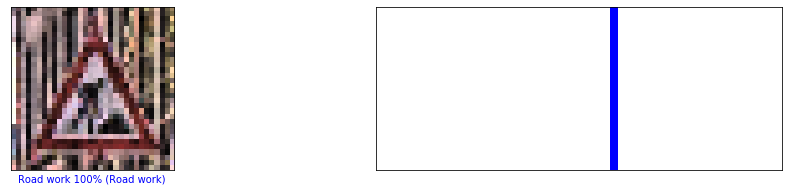

In [72]:
i = 212
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.savefig('PredictionHistogram10.png', dpi = 300)

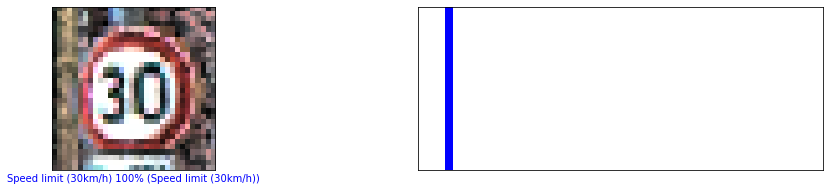

In [49]:
i = 1
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

---
<font color='maroon'>Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label.</font>

---

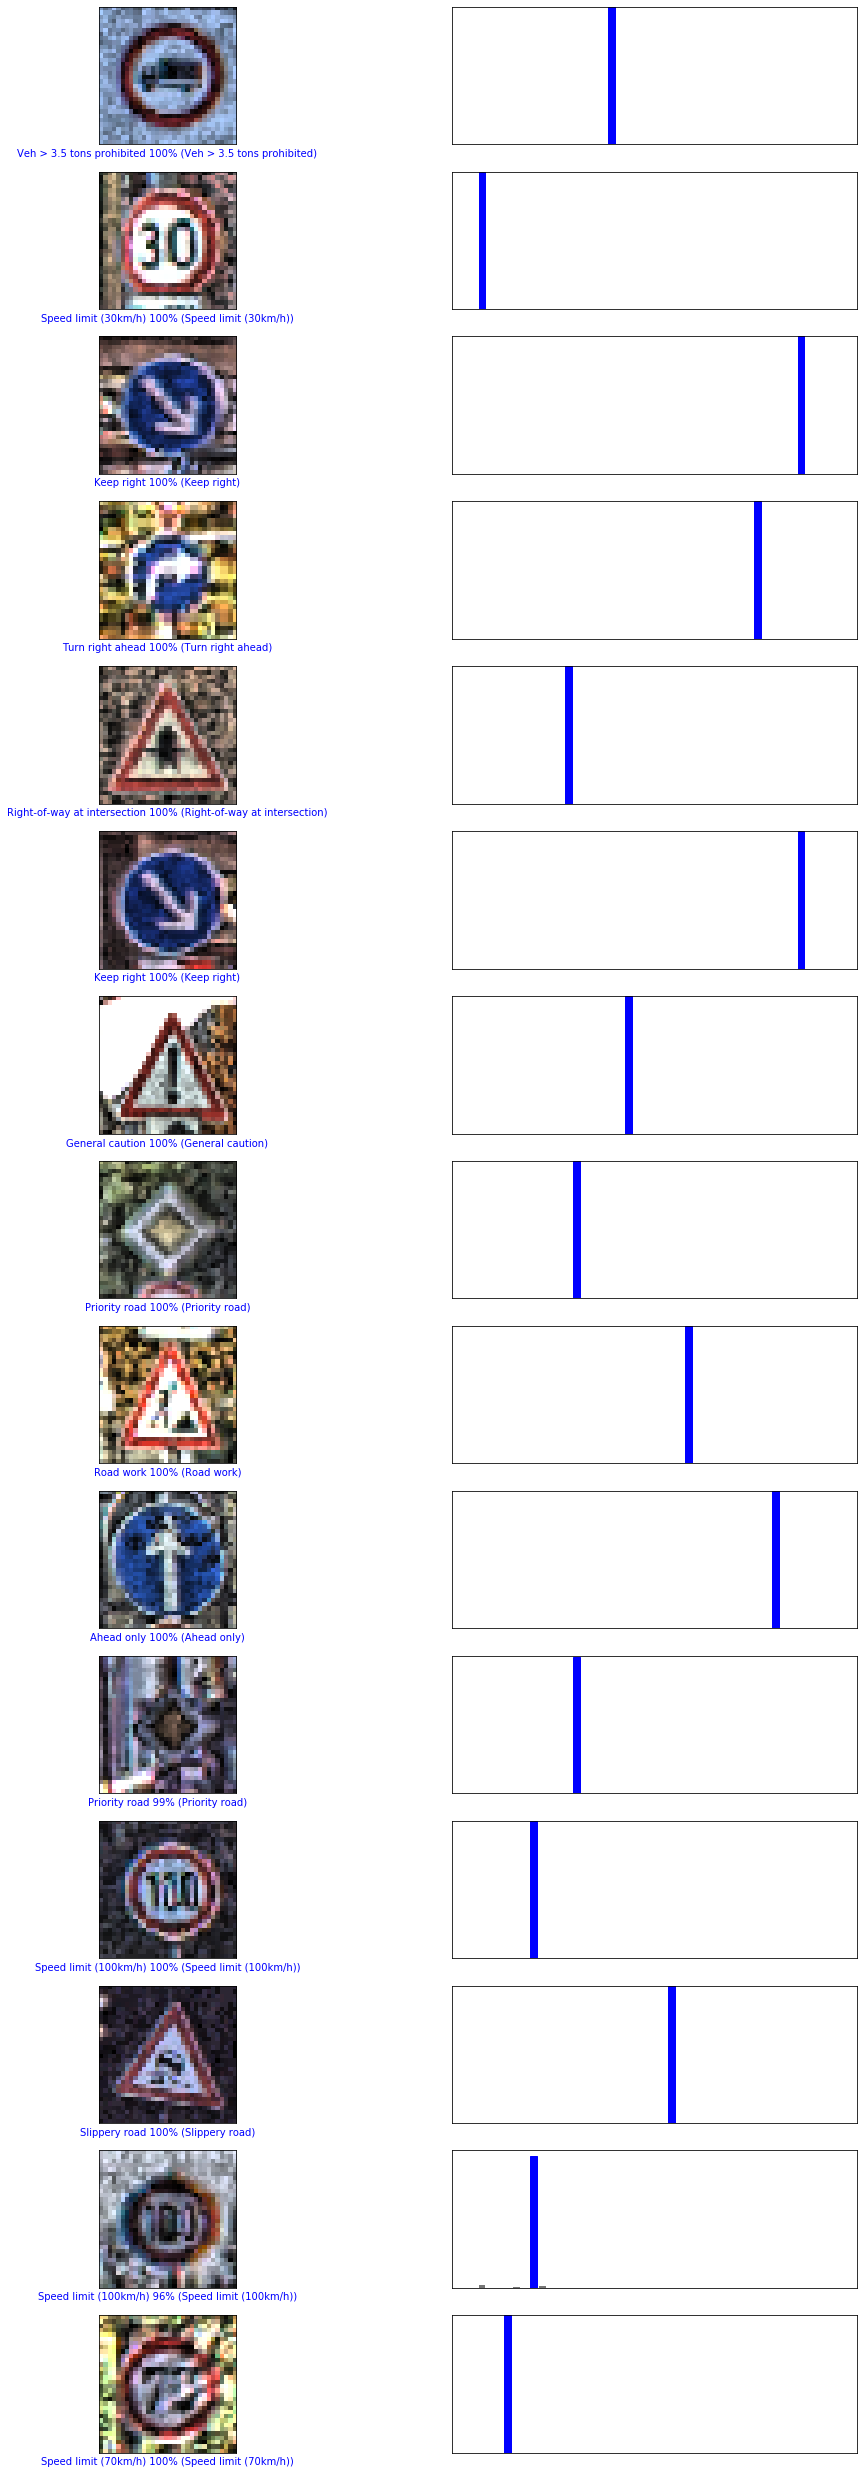

In [23]:
num_rows = 15
num_cols = 1
num_images = num_rows * num_cols
plt.figure(figsize=(4 * 4 * num_cols, 3 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)